In [1]:
# Setup
import pandas as pd
import warnings
warnings.filterwarnings("ignore") # cheeky ignore to supress one error

url = "https://raw.githubusercontent.com/LukeSyverson/DataSciencePortfolio/refs/heads/main/CoffeeRatingPredictions/simplified_coffee.csv"
df = pd.read_csv(url)

import matplotlib.pyplot as plt
import seaborn as sns


### Quick Summary Analysis

In [2]:
# Let's peak at the import to get acquainted with the data.
df.head()

# I'll probably exclude name, origin_2, desc_2 & 3 from the model.

,name,roaster,roast,loc_country,origin,100g_USD,rating,review_date,review
0,Ethiopia Shakiso Mormora,Revel Coffee,Medium-Light,United States,Ethiopia,4.70,92,November 2017,"Crisply sweet, cocoa-toned. Lemon blossom, roa..."
1,Ethiopia Suke Quto,Roast House,Medium-Light,United States,Ethiopia,4.19,92,November 2017,"Delicate, sweetly spice-toned. Pink peppercorn..."
2,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,Medium,United States,Ethiopia,4.85,94,November 2017,"Deeply sweet, subtly pungent. Honey, pear, tan..."
3,Ethiopia Kayon Mountain,Red Rooster Coffee Roaster,Light,United States,Ethiopia,5.14,93,November 2017,"Delicate, richly and sweetly tart. Dried hibis..."
4,Ethiopia Gelgelu Natural Organic,Willoughby's Coffee & Tea,Medium-Light,United States,Ethiopia,3.97,93,November 2017,"High-toned, floral. Dried apricot, magnolia, a..."


In [3]:
# Verify import datatypes
df.info()

# I note 1246 observations.
# I might adjust the review_date type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1246 non-null   object 
 1   roaster      1246 non-null   object 
 2   roast        1234 non-null   object 
 3   loc_country  1246 non-null   object 
 4   origin       1246 non-null   object 
 5   100g_USD     1246 non-null   float64
 6   rating       1246 non-null   int64  
 7   review_date  1246 non-null   object 
 8   review       1246 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 87.7+ KB


In [4]:
df.describe()

# We'll limit the descriptive analysis here as it's out-of-scope for this assignment.
# Importantly, we have minimal variance in our target.

,100g_USD,rating
count,1246.000000,1246.000000
mean,10.479125,93.306581
std,13.486674,1.479413
min,0.170000,84.000000
25%,5.260000,93.000000
50%,6.170000,93.000000
75%,9.600000,94.000000
max,132.280000,97.000000


## Visualizations

### 1. Histogram

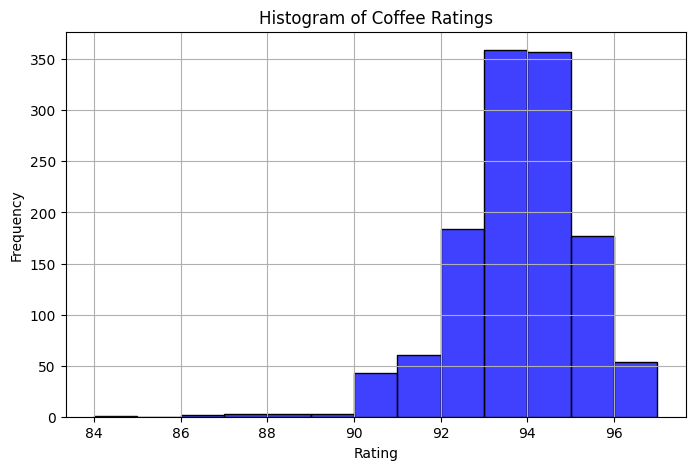

In [5]:
# Let's use the trusty histogram for our first plot.
# We'll use our target (ratings) to qualify the behavior of ratings from coffeereview.com
# Note: 13 distinct ratings made for 13 bins. Typical prime number behavior :)

plt.figure(figsize=(8, 5))
sns.histplot(df['rating'], bins=13, kde=False, color='blue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Coffee Ratings')
plt.grid(True)
plt.show()


#### Evaluation:
The ratings appear left-skewed (per outliers), mesokurtic, and are approximately normally distributed. I'll need to consider the tradeoff in bias vs. accuracy for removing or otherwise addressing those 'outliers'. While the distance in the possible rating range of 0:100 is small, the relative distance between the mean and the min ratings is large.

### 2. Boxplots

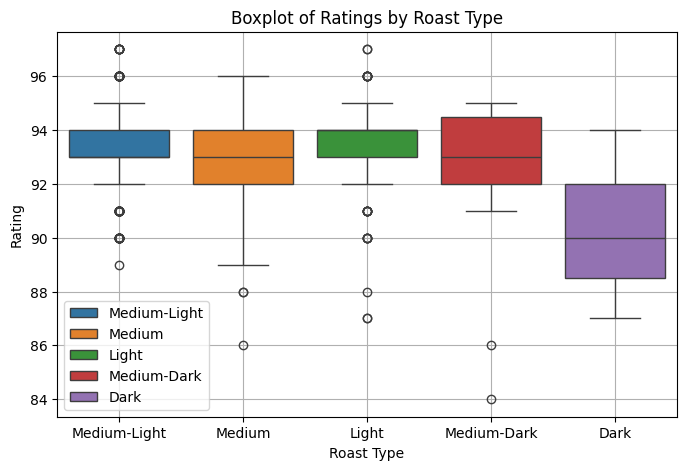

In [6]:
# Let's use boxplots to understand our variance and outliers better
# and in the context of an important feature: "roast".

plt.figure(figsize=(8, 5))
sns.boxplot(x='roast', y='rating', data=df, hue='roast', dodge=False)
plt.xlabel('Roast Type')
plt.ylabel('Rating')
plt.title('Boxplot of Ratings by Roast Type')
plt.grid(True)
plt.legend(title=None)
plt.show()


#### Evaluation:
I want to figure out how to superimpose frequency on these plots to give a better sense of their relative weights. Higher variance appears in the presumably less-popular blends (Medium and dark are typically the most popular), and variance isn't uniform across roasts. Notably, Dark blends have a lower mean than others in ratings, which I would attribute to the recent coffee trend of preferring brighter and more acidic light(er), more 'modern' blends.

### 3. Scatter Plot

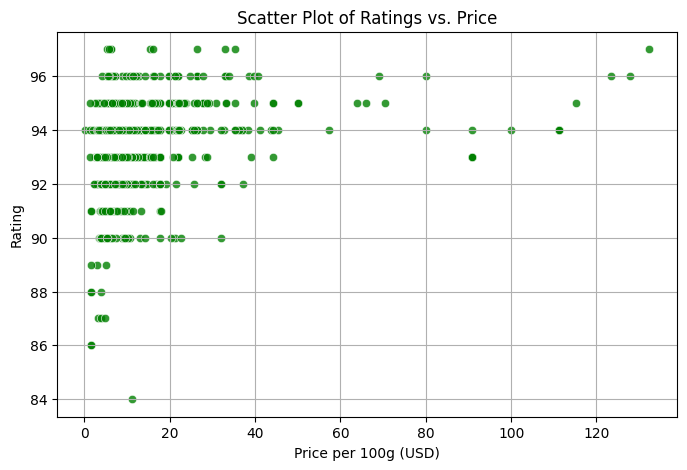

In [7]:
# We shouldn't neglect price per 100-gram!

plt.figure(figsize=(8, 5))
sns.scatterplot(x='100g_USD', y='rating', data=df, color='green', alpha=0.8)
plt.xlabel('Price per 100g (USD)')
plt.ylabel('Rating')
plt.title('Scatter Plot of Ratings vs. Price')
plt.grid(True)
plt.show()


#### Evaluation:
For many coffee drinkers I know, price substantially influences the rating. While I may have some bias personally toward a higher value coffee (price to quality ratio), that sentiment may not be shared among the reviewers in this sample.
Outliers occur past the $40 mark, which could indicate a useful subset and/or a need to stratify the data according to price buckets. I should revisit this analysis to identify variance in price, maybe according to roasteries.

### Line Plot (Time Series)

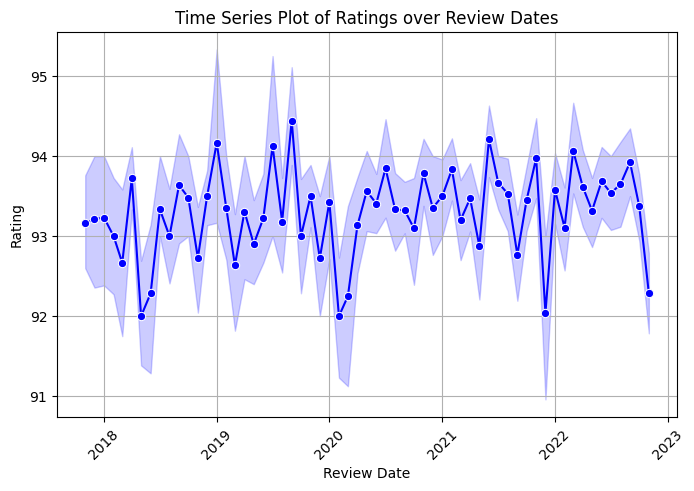

In [8]:
# Let's round out the EDA by checking for trends since we have this nice time series data!
# Firstly, I'll convert the feature to a more proper datatype. 
df['review_date'] = pd.to_datetime(df['review_date'])

plt.figure(figsize=(8, 5))
sns.lineplot(x='review_date', y='rating', data=df, marker='o', color='blue')
plt.xlabel('Review Date')
plt.ylabel('Rating')
plt.title('Time Series Plot of Ratings over Review Dates')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


#### Evaluation:
I spot three distinct local minima and maxima, with the most enduring review dip at the beginning of 2020. Maybe people projected their pandemic discontentment into their coffee reviews?
Other than that silly speculation, there may be a slight positive trend occurring, but I would like to see if the popularity of the site has diminished over time, and the more recent reviews are less than the older ones.

## Conclusion:
There's plenty more analysis to fully understand the data at hand, but for the grader's sake (and mine), we'll continue that later. The categorical variables we analyzed impose different variances across ratings, which should make for an interesting model. I wonder if the sample size is too small to trust some deep-learning methods to accommodate for the heteroskedastic behavior or if the behavior is influential in the result at all. I'll be sure to put together a few subsets to test, consider filtering some selections on price, possibly 'bucketize' ratings, and consider using an ensemble model to include both text and regression predictions.

# Milestone 2

In [9]:
# Let's check where we left off.
df.info()
# Null values present in 'roast'. Everything else looks about ready to go.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   name         1246 non-null   object        
 1   roaster      1246 non-null   object        
 2   roast        1234 non-null   object        
 3   loc_country  1246 non-null   object        
 4   origin       1246 non-null   object        
 5   100g_USD     1246 non-null   float64       
 6   rating       1246 non-null   int64         
 7   review_date  1246 non-null   datetime64[ns]
 8   review       1246 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 87.7+ KB


#### Correcting for Missing Data

In [10]:
# Let's correct for the nulls by providing a new title 'N/A'.
df0 = df.copy()
df0['roast'] = df0['roast'].fillna('N/A')
df0.info()
# Now, all of our features are the same non-null length.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   name         1246 non-null   object        
 1   roaster      1246 non-null   object        
 2   roast        1246 non-null   object        
 3   loc_country  1246 non-null   object        
 4   origin       1246 non-null   object        
 5   100g_USD     1246 non-null   float64       
 6   rating       1246 non-null   int64         
 7   review_date  1246 non-null   datetime64[ns]
 8   review       1246 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 87.7+ KB


#### Feature Selection

In [11]:
# 'name' and 'review_date' will have a trivial influence on the rating,
# and should be excluded for modeling purposes.
df0 = df0.drop(columns=['name', 'review_date'])


#### Feature transformation

In [12]:
# Let's process that review text now. I'll use a tf-idf vectorizer and assume all the reviews are English.
from sklearn.feature_extraction.text import TfidfVectorizer

# init tfidf, then fit to reviews
tfidf = TfidfVectorizer(stop_words='english', max_features=100)
tfidf_matrix = tfidf.fit_transform(df0['review'])


#### Feature Engineering

In [13]:
# We'll create a new feature that groups an average price to the origin level.
# Later, we'll assess whether the model benefits from the alternative feature,
# or if the redundancy doesn't add value.

origin_price_avg = df0.groupby('origin')['100g_USD'].transform('mean')
df0['origin_price_avg'] = origin_price_avg
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   roaster           1246 non-null   object 
 1   roast             1246 non-null   object 
 2   loc_country       1246 non-null   object 
 3   origin            1246 non-null   object 
 4   100g_USD          1246 non-null   float64
 5   rating            1246 non-null   int64  
 6   review            1246 non-null   object 
 7   origin_price_avg  1246 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 78.0+ KB


#### Dummy Variables

**EDIT:**
I've removed 'roaster' from the dummies, and removed it from the model (just before the train/test split step. Per the conclusions of the last milestone, 'roaster' is likely an obsfucating feature, and harbors little predictive strength. This insight 

In [14]:
# We'll convert most of our features to dummy variables.
# I'll keep the dataframes separate for now. 
df1 = df0.copy()
df1 = pd.get_dummies(df1, columns=['roast', 'loc_country', 'origin'], drop_first=True)
df1.info()
# I'll rewrite the code into a preprocessing pipeline in the next milestone.
# Keeping everything neat should help with code interpretability, and making changes
# in the pipeline vs. between dataframe appendations should be easier.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   roaster                                  1246 non-null   object 
 1   100g_USD                                 1246 non-null   float64
 2   rating                                   1246 non-null   int64  
 3   review                                   1246 non-null   object 
 4   origin_price_avg                         1246 non-null   float64
 5   roast_Light                              1246 non-null   bool   
 6   roast_Medium                             1246 non-null   bool   
 7   roast_Medium-Dark                        1246 non-null   bool   
 8   roast_Medium-Light                       1246 non-null   bool   
 9   roast_N/A                                1246 non-null   bool   
 10  loc_country_Canada                       1246 no

# Milestone 3

**A note:** I struggled to integrate the code for a pipeline, so I elected to continue building the model for this milestone using the pre-week-8 knowledge. I might try to tackle it this week, but I wanted the focus here to be on the quality of the analysis and modeling.

In [15]:
# I wanted to verify the number of unique values before get_dummies.
# If there are too many variables, the model could perform poorly.
df0.nunique()


roaster              300
roast                  6
loc_country           12
origin                27
100g_USD             345
rating                13
review              1246
origin_price_avg      27
dtype: int64

We see the most unique category is 'roaster', which I hesitate to remove per the possible influence on the prediction. This model evaluation should indicate whether I should engage in a feature selection process after preprocessing.
I'll also rewrite the preprocessing (if not in a pipeline) to get_dummies before concatenating to the dataframe, in the event I want to omit 'roaster' as well.

In [16]:
# I'll need to concatenate my tfidf into the same dataframe for analysis
# as the rest of the features for simplicity's sake.

# This code will first create a dataframe from the tfidf series, using the properties
# of the series (get_feature_names_out) to assign colnames to the feature, first transformed
# to an array to fit datatype requirements of the pd.DataFrame method.
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
# I'll then concatenate the dataframe with the original. Research indicates that
# resetting the indices on both dataframes will ensure aligned values before concatenation.
df1 = pd.concat([df1.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)
# Lastly, we'll remove the 'review' column since we have the tfidf in its place.
df1 = df1.drop(columns=['review'])


In [17]:
# We'll evaluate the concatenation.
df1.info()
# We've added 100 floats and removed the object,
# which indicates successful tfidf integration (per max features = 100 previously).

# I am morbidly curious how 444 features will perform.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Columns: 146 entries, roaster to zest
dtypes: bool(42), float64(102), int64(1), object(1)
memory usage: 1.0+ MB


In [18]:
# Time to prep the train/test split!
from sklearn.model_selection import train_test_split

X = df1.drop(columns=['rating', 'roaster'])
y = df1['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


### Model Justification
Since we're attempting a quantitative prediction, we'll start with a simple linear regression, then follow up with a random forest regression. I don't see the need to increase the complexity of the model selection just yet, given that our ambitious model includes both tfidf and one-hot encoded qualifiers. Depending on the outcome, we'll consider changing the models used, but I imagine that linreg will continue to be our baseline as we improve our data engineering for the modeling.


**EDIT:**
I'm adding Lasso, Ridge & Elastic regressions to the code to attempt a better prediction.

In [19]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

lin = LinearRegression()
lasso = Lasso()
ridge = Ridge()
elastic = ElasticNet()

lin.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
elastic.fit(X_train, y_train)

y_pred_lin = lin.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_elastic = elastic.predict(X_test)


**EDIT:**
I'll use a dictionary to store the predictions, then use a for loop to print the evaluation metrics. 

In [20]:
# Let's print some simple evaluation metrics. I don't want to overcomplicate the evaluation
# of the primitive model selection, when time would be better spent refactoring
# the data engineering preceeding the model training.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

models = {
    'Linear Regression': y_pred_lin,
    'Lasso': y_pred_lasso,
    'Ridge': y_pred_ridge,
    'ElasticNet': y_pred_elastic
}

for model_name, y_pred in models.items():
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name}:")
    print(f"  Mean Absolute Error (MAE): {mae}")
    print(f"  Mean Squared Error (MSE): {mse}")
    print(f"  Root Mean Squared Error (RMSE): {rmse}")
    print(f"  R² Score: {r2}\n")


Linear Regression:
  Mean Absolute Error (MAE): 0.7572543047563255
  Mean Squared Error (MSE): 0.9580902696557976
  Root Mean Squared Error (RMSE): 0.9788208567740052
  R² Score: 0.49081086859279455

Lasso:
  Mean Absolute Error (MAE): 1.0666210349194236
  Mean Squared Error (MSE): 1.7953854514252092
  Root Mean Squared Error (RMSE): 1.3399199421701318
  R² Score: 0.04581980685309872

Ridge:
  Mean Absolute Error (MAE): 0.7228495995061057
  Mean Squared Error (MSE): 0.8647269070918662
  Root Mean Squared Error (RMSE): 0.9299069346401639
  R² Score: 0.5404300026084894

ElasticNet:
  Mean Absolute Error (MAE): 1.0572074553882307
  Mean Squared Error (MSE): 1.7705743149438151
  Root Mean Squared Error (RMSE): 1.330629292832461
  R² Score: 0.05900599758513214



In [21]:
# Let's compare against an rf-reg to see if there are appreciable performance gains.
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)


In [22]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Regressor - MSE: {mse_rf}, MAE: {mae_rf}, R²: {r2_rf}')


Random Forest Regressor - MSE: 0.7809359999999997, MAE: 0.6732800000000004, R²: 0.5849617346938776


In [23]:
# Without getting too deep into the refactoring, I want to briefly catch the
# feature importances from the rf-reg.
importances = rf_reg.feature_importances_
# We'll create a quick dataframe to hold and sort the values for easy printing.
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print(feature_importance_df)


               Feature  Importance
95               juicy    0.103162
0             100g_USD    0.073955
54               brisk    0.055406
139            velvety    0.048985
80              flavor    0.039971
..                 ...         ...
8    loc_country_China    0.000004
42       origin_Uganda    0.000000
14   loc_country_Kenya    0.000000
40     origin_Tanzania    0.000000
41     origin_Thailand    0.000000

[144 rows x 2 columns]


We can see there's opportunity in our feature selection here. As I suspected, 'roaster' seems to be lacking significance. More on that later!

## Conclusion


### Model Evaluation & Comparison
We explain 56% of the variance, with possible outlier influence per the ~0.25 decrease from MSE to MAE. Primary influences for the random forest are tfidf values and price, unsurprisingly. It seems our reviewers are more price-conscious than I originally thought.

The models aren't performing with substantial accuracy, which I could attribute to several possibilities:
* The presence of outliers is degrading the predictive strength of the model. I can more deliberately minimize their influence by removing them and re-evaluating model performance.
* No substantial feature selection was conducted. I don't regret this for the milestone, but I will refactor the code for the final deliverable. I'll consider PCA and test removing 'roaster' from the dataframe.
* No regularization was employed to penalize large coefficients/ minimize feature cardinality. I'll consider L1 and L2 regression techniques.
* No scaling of numerical features was employed. Scaling may assist the predictive model's accuracies, especially considering the odd natural scale.
* Noisy/irrelevant features may be present. This problem warrants correlation analysis.
* Lack of interaction features. While this is less likely, given the model's simplicity, the addition may reveal more than sentiment and price alone.


### Outliers
Our model is likely impacted by the outliers I neglected to remove from our left-skewed ratings, and there's possible multicollinearity between the features; I suspect 'origin' and 'loc_country' to be a confounding influence here. The expensive roasts may also be influential outliers, but I hesitate to introduce bias when the price is the #2 predictor in the rf-reg model.


### Next Steps
Data engineering is, as expected, the biggest opportunity for our modeling. I learned that casually including all of the features available without pre-filtering to more influential content doesn't perform well, even with minimal quantifiable variance in the target, which is something I assumed would simplify the evaluation.

After refactoring the initial feature selection, adjusting for outliers, and tweaking the tfidf parameters, I'll test to check for improvement, then move on to the model improvements. I'm confident that a substantial impact will manifest when I simplify the one-hot features (presumably remove 'roasters') and the model improvements will create a comparatively marginal impact.
